<a href="https://colab.research.google.com/github/BarriosJP/JP-FCEN-UBA/blob/main/ImperiumAO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [269]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from numpy.polynomial.polynomial import polyfit

# Paquetes para Componentes Principales
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Paquetes para k-means
from sklearn.cluster import KMeans

#Modelo de decision

In [270]:
ruta= "https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5Jzh1TN-KzMXnxewnlbPNcBdvGj8EB7VJhMfNXkibCPm-5OPiyGB-EgZH_7EktA8jZ76DuNrelkkx/pub?gid=1553565961&single=true&output=csv"
df_monsters= pd.read_csv(ruta)
df_monsters.head()

,Nombre,Exp,Oro,Hp,t_min_respawn (s),t_max_respawn (s),deltaT
0,Hormiga,17,5,5,7,12,5
1,Gallo Salvaje,28,10,10,4,8,4
2,Murciélago,35,15,15,4,8,4
3,Rata,40,15,15,2,2,0
4,Murciélago,39,18,18,4,8,4


In [271]:
m_id= np.zeros(len(df_monsters['Nombre']))
m_id

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [272]:
for i in range(len(m_id)):
  m_id[i]=i+1
print(m_id)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196.
 197. 

In [273]:
df_monsters['id']= m_id
print(df_monsters['id'])

0        1.0
1        2.0
2        3.0
3        4.0
4        5.0
       ...  
204    205.0
205    206.0
206    207.0
207    208.0
208    209.0
Name: id, Length: 209, dtype: float64


In [274]:
df_monsters['Oro/Hp']= df_monsters['Oro']/df_monsters['Hp']
df_monsters['Exp/Hp']= df_monsters['Exp']/df_monsters['Hp']
df_monsters['Oro/Exp'] = df_monsters['Oro']/df_monsters['Exp']
df_monsters.head()

,Nombre,Exp,Oro,Hp,t_min_respawn (s),t_max_respawn (s),deltaT,id,Oro/Hp,Exp/Hp,Oro/Exp
0,Hormiga,17,5,5,7,12,5,1.0,1.0,3.400000,0.294118
1,Gallo Salvaje,28,10,10,4,8,4,2.0,1.0,2.800000,0.357143
2,Murciélago,35,15,15,4,8,4,3.0,1.0,2.333333,0.428571
3,Rata,40,15,15,2,2,0,4.0,1.0,2.666667,0.375000
4,Murciélago,39,18,18,4,8,4,5.0,1.0,2.166667,0.461538


In [275]:
#Normalizo diviendo por el valor maximo de cada columna nueva creada
df_monsters['Oro/Hp_Norm']= df_monsters['Oro/Hp'] / df_monsters['Oro/Hp'].max()
df_monsters['Exp/Hp_Norm']= df_monsters['Exp/Hp'] / df_monsters['Exp/Hp'].max()
df_monsters['Oro/Exp_Norm']= df_monsters['Oro/Exp'] / df_monsters['Oro/Exp'].max()

In [276]:
df_monsters

,Nombre,Exp,Oro,Hp,t_min_respawn (s),t_max_respawn (s),deltaT,id,Oro/Hp,Exp/Hp,Oro/Exp,Oro/Hp_Norm,Exp/Hp_Norm,Oro/Exp_Norm
0,Hormiga,17,5,5,7,12,5,1.0,1.000000,3.400000,0.294118,1.000000,0.377778,0.235294
1,Gallo Salvaje,28,10,10,4,8,4,2.0,1.000000,2.800000,0.357143,1.000000,0.311111,0.285714
2,Murciélago,35,15,15,4,8,4,3.0,1.000000,2.333333,0.428571,1.000000,0.259259,0.342857
3,Rata,40,15,15,2,2,0,4.0,1.000000,2.666667,0.375000,1.000000,0.296296,0.300000
4,Murciélago,39,18,18,4,8,4,5.0,1.000000,2.166667,0.461538,1.000000,0.240741,0.369231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Gran Dragón Negro,5940000,440000,1100000,43200,72000,28800,205.0,0.400000,5.400000,0.074074,0.400000,0.600000,0.059259
205,Segador Congelado,12750000,1500000,1500000,28800,50400,21600,206.0,1.000000,8.500000,0.117647,1.000000,0.944444,0.094118
206,Dragón Legendario,9506250,650000,1625000,57600,86400,28800,207.0,0.400000,5.850000,0.068376,0.400000,0.650000,0.054701
207,Rey Dragón,14000000,900000,2250000,79200,108000,28800,208.0,0.400000,6.222222,0.064286,0.400000,0.691358,0.051429


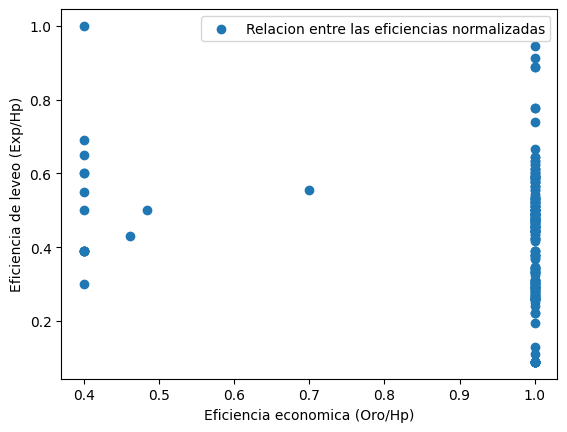

In [277]:
#graficos para visualizar/analizar tabla

plt.scatter(df_monsters['Oro/Hp_Norm'], df_monsters['Exp/Hp_Norm'], label='Relacion entre las eficiencias normalizadas')
plt.ylabel('Eficiencia de leveo (Exp/Hp)')
plt.xlabel('Eficiencia economica (Oro/Hp)')
plt.legend()
plt.show()

Es mucho más variable (heterogenea) la eficiencia de leveo que la de ganancia de oro. Y la eficiencia de oro toma valores concentrados alrededor de 0.4 y 1.

La eficiencia economica no es determinante para la eficiencia de leveo. Es decir, no hay ningun tipo de relacion funcional entre ganar oro y experiencia en funcion de la vida. (esto es CLAVE porque confirma que para dos objetivos diferentes (oro o exp) hay que buscar dos grupos de monstruos diferentes)



---



In [278]:
dfmNP= df_monsters.to_numpy()
E_exp= np.array(dfmNP[:,12])
E_oro= np.array(dfmNP[:,11])
#print(dfmNP)
#print(E_oro)
print(E_oro)

[1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.4 1.0
 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
 1.0 1.0 1.0 0.4 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.7 0.4 1.0 1.0 1.0 1.0 1.0
 1.0 1.0 1.0 1.0 0.4 1.0 1.0 1.0 0.4 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
 1.0 1.0 1.0 0.4 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.4 1.0
 0.4 0.4 0.4838709677419355 1.0 0.4 1.0 0.4 1.0 0.4 0.4
 0.46153846153846156]


In [250]:
x_lin= np.ones(218)
x_lin

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

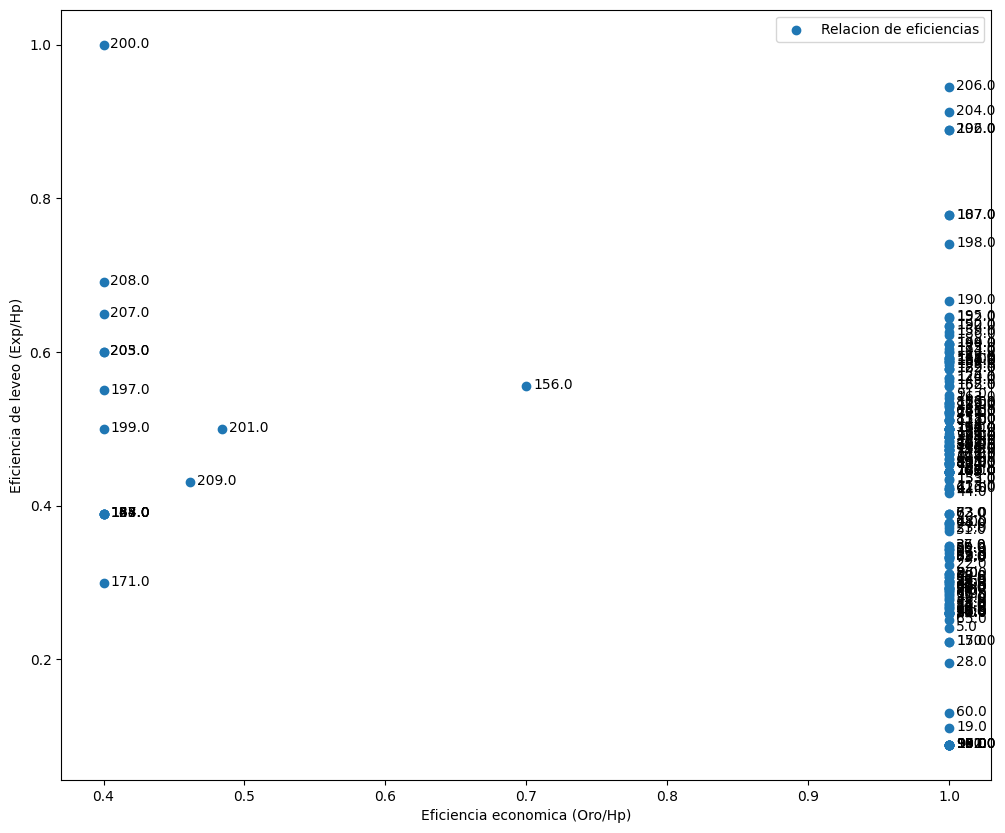

In [279]:
#Para un modo de juego centrado en el oro definimos...
#alpha= 1 (deprecated)
#beta = 0 (deprecated)

#E = lambda x: alpha*E_oro*x + beta*E_exp*x (deprecated)

#Grafico
plt.figure(figsize=(12, 10))
for label, x, y in zip(m_id, E_oro, E_exp):
    plt.annotate(label, xy=(x, y), xytext=(5, -2), textcoords='offset points')
plt.scatter(E_oro, E_exp, label= 'Relacion de eficiencias')
#plt.scatter(x_lin, f(x_lin) , marker='.', label='Monstruos optimos bajo enfoque economico') (deprecated)
plt.ylabel('Eficiencia de leveo (Exp/Hp)')
plt.xlabel('Eficiencia economica (Oro/Hp)')
plt.legend()
plt.show()

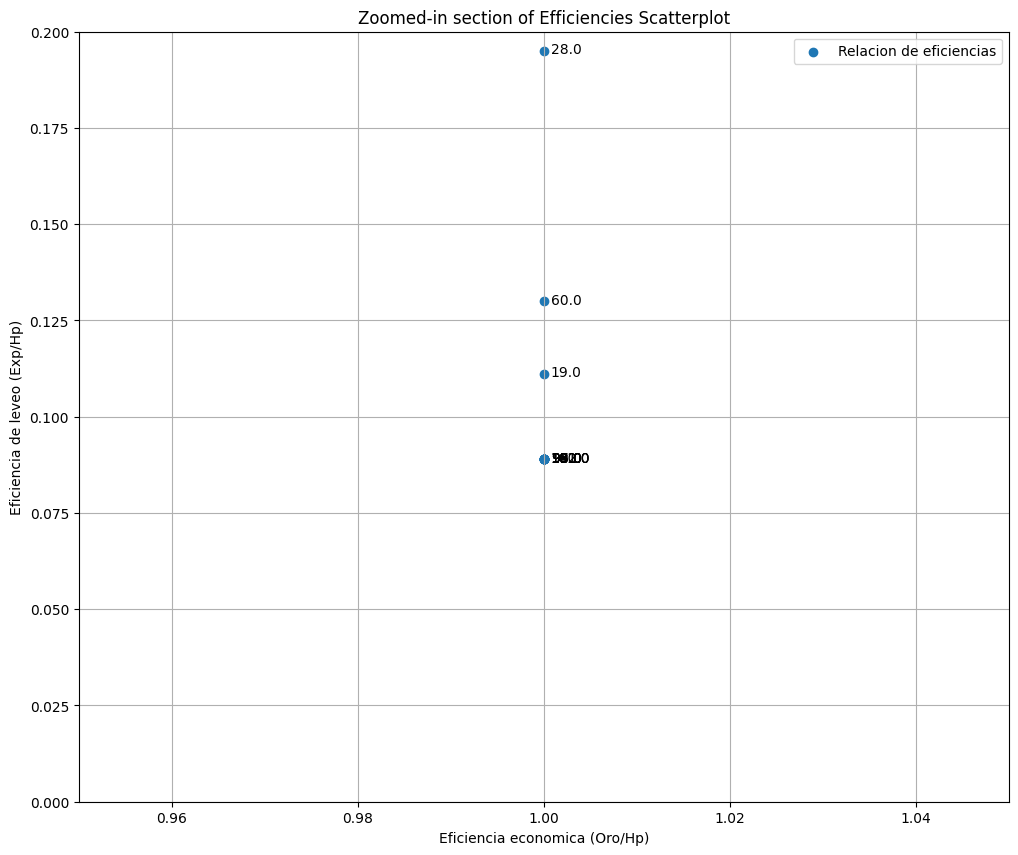

In [281]:
# Example of zooming into a specific section of the scatterplot
plt.figure(figsize=(12, 10))
for label, x, y in zip(m_id, E_oro, E_exp):
    plt.annotate(label, xy=(x, y), xytext=(5, -2), textcoords='offset points')
plt.scatter(E_oro, E_exp, label= 'Relacion de eficiencias')

# Set X and Y axis limits to 'zoom in'
# You can adjust these values to focus on the area you're interested in
plt.xlim(0.95, 1.05)  # Example: zoom on X-axis from 0.2 to 0.6
plt.ylim(0, 0.2)    # Example: zoom on Y-axis from 0 to 0.4

plt.ylabel('Eficiencia de leveo (Exp/Hp)')
plt.xlabel('Eficiencia economica (Oro/Hp)')
plt.title('Zoomed-in section of Efficiencies Scatterplot')
plt.legend()
plt.grid(True)
plt.show()

In [233]:
df_monsters['id']

,id
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0
...,...
213,214.0
214,215.0
215,216.0
216,217.0


Maxima eficiencia economica a baja eficiencia de leveo:

In [283]:
display(df_monsters.iloc[[101, 100, 99, 98, 97, 96, 95, 18, 59, 27], :]) #Id 102, 101, 100, 99, 98, 97, 96, 19, 60, 28

,Nombre,Exp,Oro,Hp,t_min_respawn (s),t_max_respawn (s),deltaT,id,Oro/Hp,Exp/Hp,Oro/Exp,Oro/Hp_Norm,Exp/Hp_Norm,Oro/Exp_Norm
101,Molthar Juncoscuro,8000,10000,10000,1800000,3600000,1800000,102.0,1.0,0.800,1.250000,1.0,0.088889,1.000000
100,Rast Vientrorojo,8000,10000,10000,1800000,3600000,1800000,101.0,1.0,0.800,1.250000,1.0,0.088889,1.000000
99,Jarnaz Filoerrante,8000,10000,10000,1800000,3600000,1800000,100.0,1.0,0.800,1.250000,1.0,0.088889,1.000000
98,Darnuk Garraferro,8000,10000,10000,1800000,3600000,1800000,99.0,1.0,0.800,1.250000,1.0,0.088889,1.000000
97,Wuzmek Gorgosapo,8000,10000,10000,1800000,3600000,1800000,98.0,1.0,0.800,1.250000,1.0,0.088889,1.000000
96,Neldrak Sombraesquirla,8000,10000,10000,1800000,3600000,1800000,97.0,1.0,0.800,1.250000,1.0,0.088889,1.000000
95,Trompi Cienoferoz,8000,10000,10000,1800000,3600000,1800000,96.0,1.0,0.800,1.250000,1.0,0.088889,1.000000
18,Guardián (s),200,200,200,6,12,6,19.0,1.0,1.000,1.000000,1.0,0.111111,0.800000
59,Fuego fatuo,2925,2500,2500,2,2,0,60.0,1.0,1.170,0.854701,1.0,0.130000,0.683761
27,Señor de las Sombras,702,400,400,6,10,4,28.0,1.0,1.755,0.569801,1.0,0.195000,0.455840


Maxima eficiencia de leveo, a muy baja eficiencia de oro:

In [284]:
df_monsters.iloc[199,:] #Id 200

,199
Nombre,Archimago Abisal
Exp,4500000
Oro,200000
Hp,500000
t_min_respawn (s),32400
t_max_respawn (s),64800
deltaT,32400
id,200.0
Oro/Hp,0.4
Exp/Hp,9.0


2° y 3° mobs con maxima eficiencia de leveo, a muy baja eficiencia de oro:

In [287]:
display(df_monsters.iloc[[207, 206], :]) #Id's 208, 207

,Nombre,Exp,Oro,Hp,t_min_respawn (s),t_max_respawn (s),deltaT,id,Oro/Hp,Exp/Hp,Oro/Exp,Oro/Hp_Norm,Exp/Hp_Norm,Oro/Exp_Norm
207,Rey Dragón,14000000,900000,2250000,79200,108000,28800,208.0,0.4,6.222222,0.064286,0.4,0.691358,0.051429
206,Dragón Legendario,9506250,650000,1625000,57600,86400,28800,207.0,0.4,5.850000,0.068376,0.4,0.650000,0.054701


Mob con eficiencia balanceada total intermedia:

In [285]:
df_monsters.iloc[155,:] #Id 156

,155
Nombre,Cría de Dragón Infernal
Exp,250000
Oro,35000
Hp,50000
t_min_respawn (s),2000
t_max_respawn (s),3000
deltaT,1000
id,156.0
Oro/Hp,0.7
Exp/Hp,5.0


Top 4 mobs con maxima eficiencia total:

In [290]:
display(df_monsters.iloc[[205, 203, 201, 195], :]) #Id's 206, 204, 202, 196

,Nombre,Exp,Oro,Hp,t_min_respawn (s),t_max_respawn (s),deltaT,id,Oro/Hp,Exp/Hp,Oro/Exp,Oro/Hp_Norm,Exp/Hp_Norm,Oro/Exp_Norm
205,Segador Congelado,12750000,1500000,1500000,28800,50400,21600,206.0,1.0,8.500000,0.117647,1.0,0.944444,0.094118
203,Imp,7800000,950000,950000,28800,46800,18000,204.0,1.0,8.210526,0.121795,1.0,0.912281,0.097436
201,Segador,6200000,775000,775000,28800,43200,14400,202.0,1.0,8.000000,0.125000,1.0,0.888889,0.100000
195,Djinn,2560000,320000,320000,25200,54000,28800,196.0,1.0,8.000000,0.125000,1.0,0.888889,0.100000


Los 6 peores mobs, en terminos de eficiencia total:

In [293]:
display(df_monsters.loc[[170, 124, 147, 156, 166, 183], :]) #Id's 171, 125, 148, 157, 167, 184

,Nombre,Exp,Oro,Hp,t_min_respawn (s),t_max_respawn (s),deltaT,id,Oro/Hp,Exp/Hp,Oro/Exp,Oro/Hp_Norm,Exp/Hp_Norm,Oro/Exp_Norm
170,Cría de Dragón Rojo,236250,35000,87500,300,600,300,171.0,0.4,2.7,0.148148,0.4,0.300000,0.118519
124,Cría de Dragón Verde,65625,7500,18750,300,600,300,125.0,0.4,3.5,0.114286,0.4,0.388889,0.091429
147,Cría de Dragón Azul,131250,15000,37500,300,600,300,148.0,0.4,3.5,0.114286,0.4,0.388889,0.091429
156,Cría de Dragón Negro,175000,20000,50000,300,600,300,157.0,0.4,3.5,0.114286,0.4,0.388889,0.091429
166,Cría de Dragón Legendario,262500,30000,75000,750,1050,300,167.0,0.4,3.5,0.114286,0.4,0.388889,0.091429
183,Cría de Rey Dragón,393750,45000,112500,1000,1300,300,184.0,0.4,3.5,0.114286,0.4,0.388889,0.091429


In [292]:
df_monsters[(df_monsters['Exp/Hp_Norm'] < 0.4) & (df_monsters['Oro/Hp_Norm'] == 0.4)]

,Nombre,Exp,Oro,Hp,t_min_respawn (s),t_max_respawn (s),deltaT,id,Oro/Hp,Exp/Hp,Oro/Exp,Oro/Hp_Norm,Exp/Hp_Norm,Oro/Exp_Norm
124,Cría de Dragón Verde,65625,7500,18750,300,600,300,125.0,0.4,3.5,0.114286,0.4,0.388889,0.091429
147,Cría de Dragón Azul,131250,15000,37500,300,600,300,148.0,0.4,3.5,0.114286,0.4,0.388889,0.091429
156,Cría de Dragón Negro,175000,20000,50000,300,600,300,157.0,0.4,3.5,0.114286,0.4,0.388889,0.091429
166,Cría de Dragón Legendario,262500,30000,75000,750,1050,300,167.0,0.4,3.5,0.114286,0.4,0.388889,0.091429
170,Cría de Dragón Rojo,236250,35000,87500,300,600,300,171.0,0.4,2.7,0.148148,0.4,0.300000,0.118519
183,Cría de Rey Dragón,393750,45000,112500,1000,1300,300,184.0,0.4,3.5,0.114286,0.4,0.388889,0.091429


# Integrando al analisis el factor 'tiempo de respawn' (en proceso...)

Ahora, con estos datos, defino un Indice de Viabilidad que sera una funcion compuesta por dos funciones lineales, siendo la primera aquella que domine sobre la eficiencia economica, y la segunda la que domine sobre la eficiencia de leveo:



$f(x)= \alpha*Eeco*x + \beta*Eexp*x$, donde:

*   $\alpha$ es un parametro definido entre 0 y 1 por el/la jugador/a en base a su modo de juego deseado, que le confiere mayor predominancia a la eficiencia economica a mas cercano al 1 sea.
*   $\beta$ es un parametro entre 0 y 1 definido por el/la jugador/a en base a su modo de juego deseado, que le confiere mayor predominancia a la eficiencia de leveo cuanto mayor sea su valor.



In [ ]:
#Para un modo de juego centrado en la experiencia definimos...
alpha= 0
beta = 1

E = lambda x: alpha*E_oro + beta*E_exp

In [ ]:
#Para un modo de juego balanceado definimos...
alpha= 0.5
beta = 0.5

E = lambda x: alpha*E_oro + beta*E_exp